In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [4]:
#create dataframe
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Obtain information of each column including mean, standard deviation etc.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
# Handling missing data
df['MEDV'] = boston.target # Inserting target variable to dataframe
df.info()
# Here we can see that there are no missing data. But if there if need to drop them using df.dropna(). 
# If a significant amount is missing we need to fill them with dummy data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<AxesSubplot:>

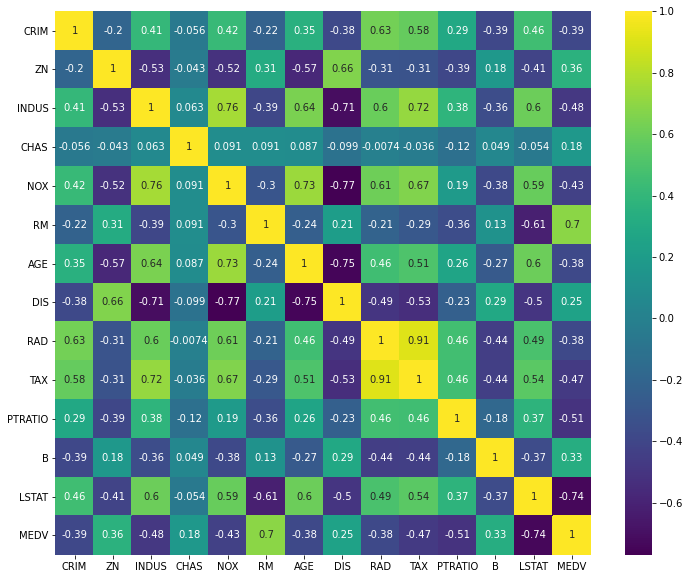

In [8]:
correlation = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap='viridis')
# We select features which has a correlation greater than abs(0.5)
# Our target variable is 'MEDV'. 'RM','PTRATIO' and 'LSTAT' are highly correlated. Therefore we will drop all the other features

In [9]:
# get list of features with correlation greater than 0.5
cor_MEDV  = abs(correlation['MEDV'])
cor_MEDV[cor_MEDV>0.5]

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

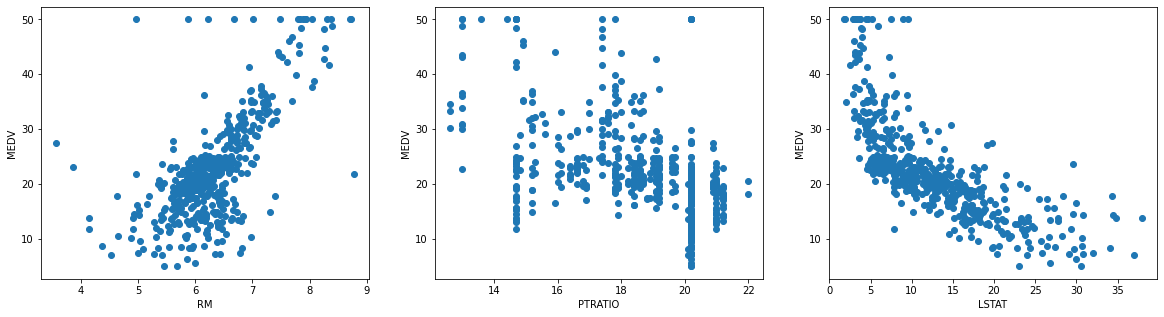

In [10]:
# Visualization of 'RM, PTRATIO, LSTAT' with target variable 'MEDV'
plt.figure(figsize=(20, 5))
columns = ['RM', 'PTRATIO', 'LSTAT']
for i in columns:
    plt.subplot(1, len(columns) , columns.index(i)+1)
    plt.xlabel(i);
    plt.ylabel('MEDV')
    plt.scatter(df[i], df['MEDV'])

In [11]:
# splitting features and target variables

y = df['MEDV']
X = df.drop('MEDV', axis=1)
#X = df[['RM', 'LSTAT']]

In [12]:
# Feature selection
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

# Here lasso regression is used to show that it can be for feature selection. Here the regularization can reduce coefficients
# of some features to zero. These features a not considered by the model.
lasso = Lasso()
# Grid search cross validation is used to find the optimal hyper-parameter alpha.
hyper_params = {'alpha' : np.arange(0,1,0.01)}
grid_search = GridSearchCV(lasso, hyper_params, cv=5)
X_scaled = scale(df.drop('MEDV', axis=1))
gs = grid_search.fit(X_scaled, y)

In [13]:
# The best value for alpha accoriding to the above 5 fold cross validation
grid_search.best_params_

{'alpha': 0.17}

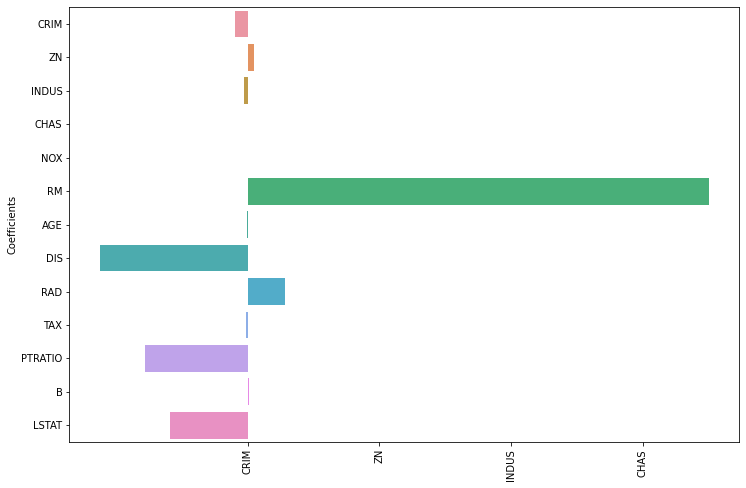

In [14]:
# Visualization of coefficients of features developed by lasso regression
lasso = Lasso(alpha=0.17)
lasso_coef = lasso.fit(X, y).coef_
features = df.drop('MEDV', axis=1).columns
plt.figure(figsize=(12,8))
plt.xticks(range(len(features)), features, rotation=90)
plt.ylabel('Coefficients')
sns.barplot(x = lasso_coef, y= features, orient='h')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_selected = X[['RM', 'LSTAT']]
X_scaled = pd.DataFrame(scale(X_selected), columns=['RM', 'LSTAT'])
y_scaled = pd.DataFrame(scale(y), columns=['MEDV'])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=40)

linear_reg = LinearRegression(n_jobs=10)
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [16]:
# Evaluate our model using the r2 score. The optimal value of r2 score is zero
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6159138047982057

In [17]:
print(linear_reg.coef_)
print(linear_reg.intercept_)

[[ 0.38857635 -0.51668287]]
[-0.06316]


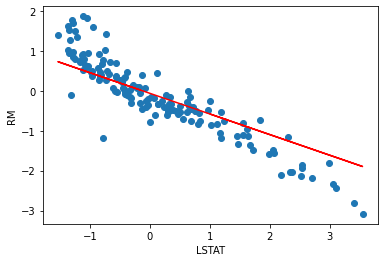

In [18]:
# Visualization of the best fit line of LSTAT vs MEDV
x = X_test.drop('RM', axis=1)
y = -0.51668287*x - 0.06316
plt.xlabel('LSTAT')
plt.ylabel('RM')
plt.scatter(x, y_pred)
plt.plot(x, y, color='red')